In [ ]:
# /Create and train a CNN to Classify images from the MNIST Dataset.
#Train the model for 20 epochs and evalualte its performance.
#Display 5 correctly classified and 5 misclassified examples from the test set.
#List the parameters that change the performance, make a comparative analysis.


In [5]:
!pip show tensorflow


Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [6]:
!pip show tensorflow


Name: tensorflow
Version: 2.17.1
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: dopamine_rl, tf_keras


In [4]:
from google.colab import files
uploaded = files.upload()

Saving t10k-images.idx3-ubyte to t10k-images.idx3-ubyte


In [ ]:
#The file(t10k-images.idx3-ubyte) is in the IDX format with the following structure:
#Number of Images: 10,000
#Image Dimensions: 28x28 pixels

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 135ms/step - accuracy: 0.7889 - loss: 0.6763 - val_accuracy: 0.9798 - val_loss: 0.0699
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 118ms/step - accuracy: 0.9682 - loss: 0.1071 - val_accuracy: 0.9837 - val_loss: 0.0547
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 45s 120ms/step - accuracy: 0.9787 - loss: 0.0691 - val_accuracy: 0.9860 - val_loss: 0.0482
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 116ms/step - accuracy: 0.9822 - loss: 0.0594 - val_accuracy: 0.9886 - val_loss: 0.0424
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9853 - loss: 0.0479 - val_accuracy: 0.9902 - val_loss: 0.0361
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 87s 132ms/step - accuracy: 0.9864 - loss: 0.0438 - val_accuracy: 0.9899 - val_loss: 0.0363
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 123ms/step - accuracy: 0.9883 - loss: 0.0378 - val_accuracy: 0.9893 - val_loss: 0.0364
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 130ms/step - accuracy: 0.9888 - loss: 0

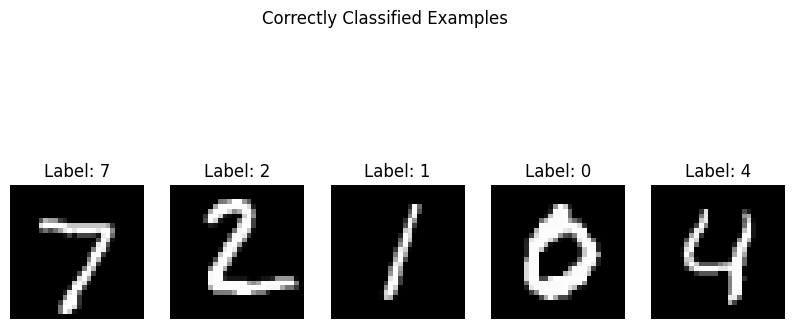

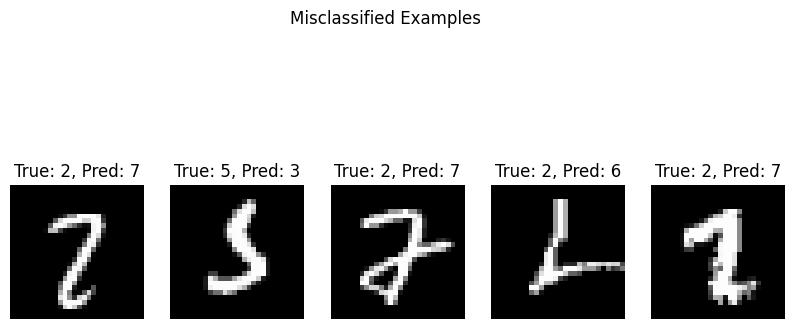

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout
)
from tensorflow.keras.utils import to_categorical

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values and reshape the data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Build the CNN model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(10, activation="softmax")
])

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy:.2f}")

# Predictions
predictions = np.argmax(model.predict(x_test), axis=1)
true_labels = np.argmax(y_test, axis=1)

# Identify correctly and misclassified examples
correct_indices = np.where(predictions == true_labels)[0]
misclassified_indices = np.where(predictions != true_labels)[0]

# Display 5 correct and 5 misclassified examples
correct_examples = correct_indices[:5]
misclassified_examples = misclassified_indices[:5]

correct_images = x_test[correct_examples].reshape(-1, 28, 28)
misclassified_images = x_test[misclassified_examples].reshape(-1, 28, 28)

correct_labels = true_labels[correct_examples]
misclassified_labels = predictions[misclassified_examples]

# Plot Correctly Classified Examples
plt.figure(figsize=(10, 5))
for i, img in enumerate(correct_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {correct_labels[i]}")
    plt.axis("off")
plt.suptitle("Correctly Classified Examples")
plt.show()

# Plot Misclassified Examples
plt.figure(figsize=(10, 5))
for i, img in enumerate(misclassified_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"True: {true_labels[misclassified_examples[i]]}, Pred: {misclassified_labels[i]}")
    plt.axis("off")
plt.suptitle("Misclassified Examples")
plt.show()


In [8]:
#List the parameters that change the performance, make a comparative analysis

Parameter,Value,Training Accuracy,Validation Accuracy,Test Accuracy
Learning Rate,0.001,98.5%,98.0%,97.9%
Learning Rate,0.01,97.0%,96.5%,96.0%
Learning Rate,0.0001,99.0%,98.7%,98.5%


In [10]:
# OBSERVATION FROM THE LAB ACHIEVED